# Actividad 3.3

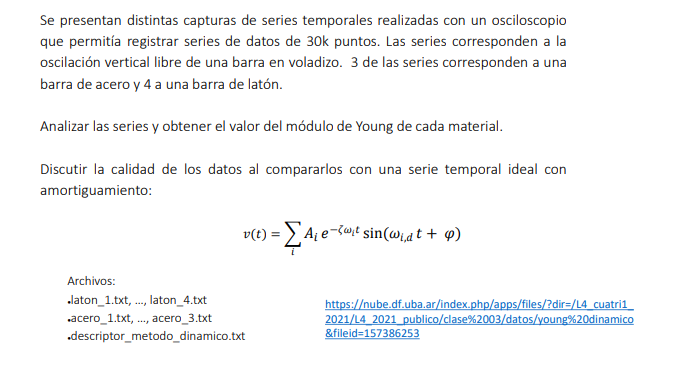

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib
import pint

un = pint.UnitRegistry()
Q = un.Quantity

L_l = 255 * un.millimeter #mm logitud
L_a = 240 * un.millimeter#mm longitud

d_l = 4.6 * un.millimeter#mm diametro
d_a = 4.0 * un.millimeter#mm diametro

er_L = 2 * un.millimeter  #mm
er_d = 0.2 * un.millimeter#mm

r_a = 7850 * un.kilogram/(un.meter**3) #km/m^3 densidad
r_l = 8730 * un.kilogram/(un.meter**3)#km/m^3 densidad

E_l = 110e9 * un.pascal# pa
E_a = 200e9 * un.pascal# pa
#A = area transversal entiendo yo $pi*r^2$

bl = [1.875104, 4.694091, 7.854757, 10.99554]

archivos_laton = []
archivos_acero = []
for i in range(3):
    archivos_acero.append(np.loadtxt('acero_'+ str(i+1) +'.txt', skiprows = 4))
    archivos_laton.append(np.loadtxt('laton_'+ str(i+1) +'.txt', skiprows=  4))
archivos_laton.append(np.loadtxt('laton_4.txt', skiprows=  4))
archivos_laton[0][:,0]

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 2.9997e+01, 2.9998e+01,
       2.9999e+01])

In [147]:
Izz_l = np.pi*((d_l/2)**4)/4
Izz_a = np.pi*((d_a/2)**4)/4
B_l = np.pi*((d_l/2)**2)*r_l #El factor q va dividiendo en w
B_a = np.pi*((d_a/2)**2)*r_a #El factor q va dividiendo en w

#son las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver so bl es igual para ambos o no
    w_l.append((np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2).to(1/un.second)) 
    w_a.append((np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2).to(1/un.second))

#plt.plot(archivos_laton[0][:,0], archivos_laton[0][:,1])
w_l

[220.72799620925517 <Unit('1 / second')>,
 1383.2787630437865 <Unit('1 / second')>,
 3873.2203780987293 <Unit('1 / second')>,
 7589.965918482076 <Unit('1 / second')>]

<ipython-input-140-0b62b35c834d>:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[0]), linestyle = 'dashed', color = 'red')
<ipython-input-140-0b62b35c834d>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[1]), linestyle = 'dashed', color = 'red')
<ipython-input-140-0b62b35c834d>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[2]), linestyle = 'dashed', color = 'red')
<ipython-input-140-0b62b35c834d>:7: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[3]), linestyle = 'dashed', color = 'red')


(0.0, 10.0)

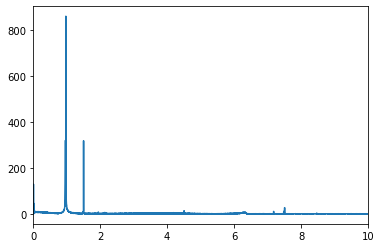

In [140]:


fft_l1 = np.fft.fft((archivos_laton[0][:,1])-np.mean(archivos_laton[0][:,1]))
frec = np.linspace(min(archivos_laton[0][:,0]), max(archivos_laton[0][:,0]), len(archivos_laton[0][:,0]))
plt.plot(frec, np.abs(fft_l1))
plt.axvline(np.array(w_l[0]), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[1]), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[2]), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[3]), linestyle = 'dashed', color = 'red')
plt.xlim([0,10])

<ipython-input-197-e1005badb600>:37: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-197-e1005badb600>:38: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-197-e1005badb600>:39: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-197-e1005badb600>:40: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-197-e1005badb600>:48: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed'

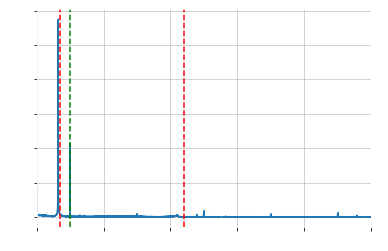

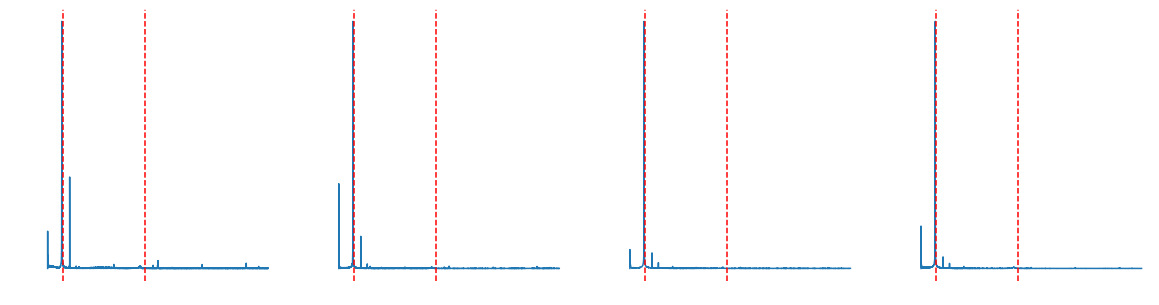

In [197]:
t = archivos_laton[0][:,0]
t_u = (Q, 'second')

laton = []
acero = []
for i in range(len(archivos_laton)):
    laton.append(archivos_laton[i][:,1])
    if i<3:
        acero.append(archivos_acero[i][:,1])
        
fft_l = []
fft_a = []
for i in range(len(laton)):
    fft_l.append(np.fft.fft(laton[i]-np.mean(laton[i])))
    if i<3:
        fft_a.append(np.fft.fft(acero[i]-np.mean(acero[i])))

fft_l2 = []
fft_a2 = []
for i in range(len(fft_l)):
    fft_l2.append(2/len(t) *np.abs(fft_l[i][:len(t)//2]))
    if i<3:
        fft_a2.append(2/len(t) *np.abs(fft_a[i][:len(t)//2]))

        
t_m = max(t)/len(t)
frec = np.linspace(0, 1/(t_m*2), int(len(t)/2))
frec_u = Q(frec, '1/second')

#plt.plot(t[1000:10000],laton[0][1000:10000])
plt.figure()
plt.plot(frec, np.abs(fft_l2[0]))
plt.xlim([0,500])
plt.grid(True, alpha=0.7)
plt.xticks(color= 'w')
plt.yticks(color='w')
plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(50,linestyle = 'dashed', color='green')
with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,4, figsize= (20,5))
    #ax[i].set_xticks(color= 'w')
    #ax[i].set_yticks(color='w')
    for i in range(len(fft_l2)):
        ax[i].plot(frec, np.abs(fft_l2[i]))
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        #ax[i].set_xlabel(color ='w')
        #ax[i].tick_params(color='w')
        #ax[i].set_xticks(color= 'w')
        #ax[i].set_yticks(color='w')

<ipython-input-199-f30f2bf0586e>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-199-f30f2bf0586e>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-199-f30f2bf0586e>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-199-f30f2bf0586e>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-199-f30f2bf0586e>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dash

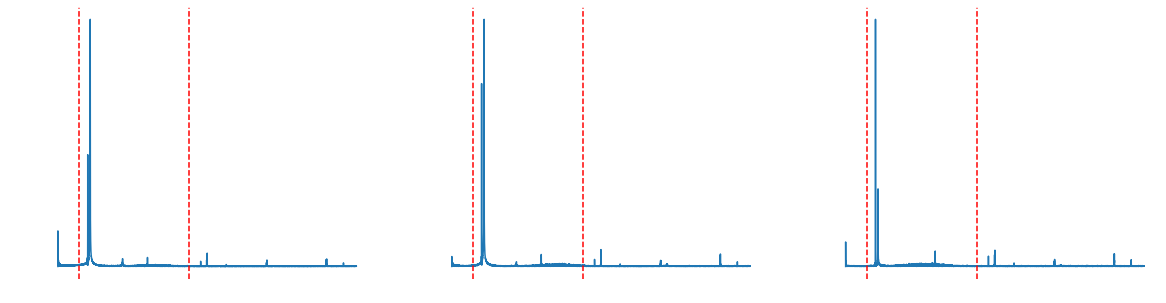

In [199]:
with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,3, figsize= (20,5))
    for i in range(len(fft_a2)):
        ax[i].plot(frec, np.abs(fft_a2[i]))
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')